# Summary of the article “Are Pretrained Convolutions Better than Pretrained Transformers?”

In [1]:
from IPython.display import display, Image

Tay, Yi, Mostafa Dehghani, Jai Gupta, Dara Bahri, V. Aribandi, Zhen Qin and Donald Metzler. “Are Pretrained Convolutions Better than Pretrained Transformers?” Annual Meeting of the Association for Computational Linguistics (2021).


https://doi.org/10.48550/arXiv.2105.03322


<p style='font-size: 16px; line-height: 1.5;'>Summarized by: Militsa Ivanova, SoftUni username: militsa082000

<p style='font-size: 16px; line-height: 1.5;'>This paper investigates the competitiveness of convolutional models in the context of pre-trained language models, comparing them to the widely adopted Transformer-based architectures.

<p style='font-size: 16px; line-height: 1.5;'>Despite early successes of recurrent architectures like LSTMs, Transformers have become the default choice.

<p style='font-size: 16px; line-height: 1.5;'>Recent work has shown that convolutional seq2seq models can outperform Transformers in some tasks, raising questions about the relevance of convolutional models in the pre-trained era.

<p style='font-size: 16px; line-height: 1.5;'>The paper's main contributions include comprehensive empirical evaluations of convolutional seq2seq models under the pre-train-fine-tune paradigm.

<p style='font-size: 16px; line-height: 1.5;'>It observes that pre-training benefits convolutional models as much as it benefits Transformers, and pre-trained convolutions can be competitive in certain scenarios in terms of model quality and training speed.

<p style='font-size: 16px; line-height: 1.5;'>The study covers experiments across eight datasets spanning various NLP tasks and domains.

<p style='font-size: 16px; line-height: 1.5;'>The evaluation is based on several datasets and tasks:

1. Toxicity Detection: CIVIL COMMENTS and WIKI TOXIC SUBTYPES datasets, involving binary classification to determine if content is toxic.
2. Sentiment Classification: IMDb reviews, Stanford Sentiment Treebank (SST-2), and Twitter Sentiment140 datasets for binary classification of document polarity.
3. News Classification: AGNews dataset for topic categorization in news articles (four-way classification).
4. Question Classification: TREC fine-grained question classification dataset with 46 categories.
5. Semantic Parsing / Compositional Generalization: COGS dataset for generating semantic representations of English sentences.

<p style='font-size: 16px; line-height: 1.5;'>The section on "Pre-Trained Convolution Models" from the paper outlines an innovative approach to building convolutional neural network models optimized for NLP tasks through pre-training. The core of this methodology revolves around the adoption of depthwise separable convolutions, recognized for their efficiency and speed over traditional convolution operations. These convolutions process input channels independently, leading to significant computational savings.




<b>Lightweight Depthwise Convolution</b>

<p style='font-size: 16px; line-height: 1.5;'>Introduced as the foundation of the pre-trained convolution model, this technique leverages depthwise convolutions characterized by their independent operation on each channel of the input tensor. The paper details how these convolutions use learnable parameters to produce outputs that maintain the input shape, offering a concise explanation of the underlying mathematics.

<p style='font-size: 16px; line-height: 1.5;'>The depthwise convolution operation for a given position and channel in the output feature map is defined as follows:

$$
O_{i,c} = \sum_{j=1}^{k} W_{c,j} \cdot X_{i+j-\left\lfloor\frac{k+1}{2}\right\rfloor, c}
$$

where:

- $(O_{i,c})$ is the output value at the ith position for the cth output channel.

- The summation symbol $(\sum_{j=1}^{k})$ sums up the results of the convolution operation over the kernel window of size \(k\).

- $(W_{c,j})$ represents the weights or learnable parameters of the convolution filter for the cth channel at the jth position within the kernel. In depthwise convolution, each input channel has a separate set of weights.

- $(X_{i+j-\left\lfloor\frac{k+1}{2}\right\rfloor, c})$ denotes the input value at the position that corresponds to the ith location plus the offset from the kernel center, for the cth channel. 

- The term $(\left\lfloor\frac{k+1}{2}\right\rfloor)$ centers the kernel over the current position (i). This part of the equation shifts the kernel over the input as the convolution operation is performed.

<p style='font-size: 16px; line-height: 1.5;'>This operation applies the filter to each channel independently, thereby reducing the computational cost compared to a full convolution while still capturing spatial hierarchies within the input data.


<b>Softmax-Normalized Kernels and Weight Sharing</b>

<p style='font-size: 16px; line-height: 1.5;'>This aspect of lightweight convolutions involves normalizing kernels with a softmax function and sharing weights across output channels. Such an approach contributes to model efficiency by reducing the number of unique parameters required.

In the standard depthwise convolution, the output $(O_{i,c})$ is computed as:

$$
O_{i,c} = \sum_{j=1}^{k} W_{c,j} \cdot X_{i+j-\left\lfloor\frac{k+1}{2}\right\rfloor, c}
$$

where $(W_{c,j})$ are the convolutional filter weights applied directly to the input.

In contrast, the lightweight convolution with softmax-normalized kernels is defined as:

$$
O^{L}_{i,c} = \sum_{j=1}^{k} \text{softmax}(W_{c,j}) \cdot X_{i+j-\left\lfloor\frac{k+1}{2}\right\rfloor, \hat{c}}
$$

<p style='font-size: 16px; line-height: 1.5;'>The differences are:

<p style='font-size: 16px; line-height: 1.5;'>1. <b>Softmax Normalization</b>: The weights $(W_{c,j})$ are first normalized using a softmax function, emphasizing the most important features within the kernel's receptive field.

<p style='font-size: 16px; line-height: 1.5;'>2. <b>Channel Sharing</b> ($(\hat{c})$): The notation $(\hat{c})$ suggests that the model may share weights across different groups of output channels, reducing the total number of parameters and model complexity.



<b>Dynamic Convolutions</b>

<p style='font-size: 16px; line-height: 1.5;'>A novel form of lightweight convolutions designed to adapt kernel weights dynamically based on the position, offering a more flexible and context-aware convolution operation. This innovation allows the model to adjust its filtering mechanism for different parts of the input sequence, potentially capturing positional nuances more effectively.

<b>Span-based Seq2Seq Pre-training</b>

<p style='font-size: 16px; line-height: 1.5;'>The paper adopts a pre-training strategy inspired by recent advancements in sequence-to-sequence (Seq2Seq) modeling. This strategy involves masking spans within input sequences and training the model to predict these masked portions, aiming to enhance the model's understanding of context and sequence structure.

<b>Convolutional Seq2Seq Architecture</b>

<p style='font-size: 16px; line-height: 1.5;'>Departing from traditional Transformer architectures, the proposed model employs convolutional blocks in place of multi-headed self-attention mechanisms. This includes using gated linear units for transformations within these blocks, suggesting a blend of convolutional operations and sequence modeling techniques for processing text.

<b> Optimization and Training Strategy</b>

<p style='font-size: 16px; line-height: 1.5;'>The model is trained using a token-wise cross-entropy loss, with teacher forcing as a guiding strategy for sequence generation. This approach ensures that the model learns to predict the next token in a sequence based on the correct preceding context, enhancing its ability to generate coherent and contextually relevant outputs.

The binary cross-entropy loss function, denoted by \( L \), is defined as:

$$
L = \sum_{t=1}^{L} \sum_{i=1}^{n} \left( \log(\pi^{(t)}_i) + (1 - y^{(t)}_i) \log(1 - \pi^{(t)}_i) \right)
$$

where:
- $( n )$ is the number of instances or samples at each time step.
- $( \pi^{(t)}_i )$ is the predicted probability of the model that class $( i )$ is the correct classification at time step $( t )$.
- $( y^{(t)}_i $) is the actual binary label for class $( i )$ at time step $( t )$.

<p style='font-size: 16px; line-height: 1.5;'>The loss function sums over all samples and time steps, penalizing the predictions that are divergent from the actual labels. The predicted probability $( \pi^{(t)}_i )$ is compared against the actual label $( y^{(t)}_i )$, with the logarithmic functions amplifying the penalty for predictions that are confident but incorrect.


<b> Experimental Setup </b>

<p style='font-size: 16px; line-height: 1.5;'>The experimental setup described in the paper involves utilizing sequence-to-sequence models, prominently inspired by successful models like BART and T5, implemented within the Mesh TensorFlow framework for distributed and parallel training. The models, both convolutional and Transformer-based, are structured with 12 layers in the encoder and decoder, and specific configurations for dimensions and head counts. Pre-training these models involves 524K steps on the Colossal Cleaned CommonCrawl Corpus with a span-based seq2seq objective, utilizing 16 TPU-v3 chips, taking about 12 hours. The pre-training process is enhanced with an Adafactor optimizer and a sophisticated learning rate scheduler. Following pre-training, the models undergo fine-tuning on downstream tasks with adjusted hyperparameters and batch sizes, aiming for optimal validation performance within 100K steps. This detailed setup underlines the rigorous approach to model training and optimization, leveraging high computational power and advanced neural network architectures to explore the efficacy of convolutional models against their Transformer counterparts in NLP tasks.

<b> Results </b>

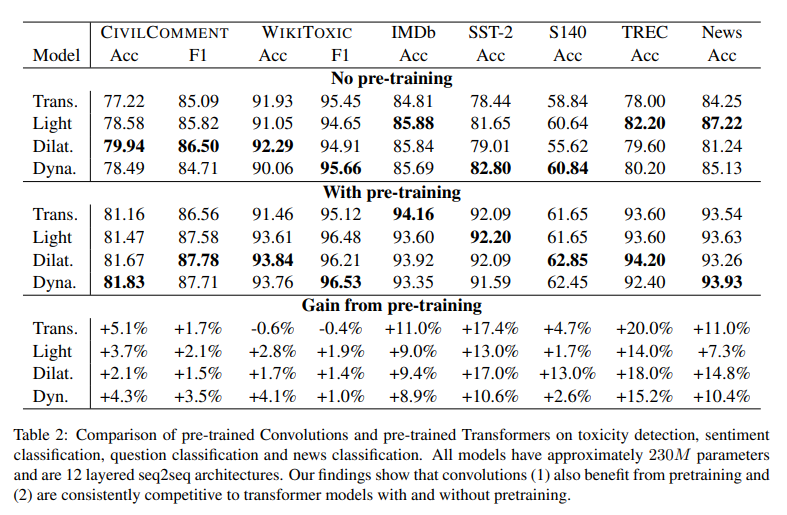

In [2]:
display(Image(filename='results.png'))

<p style='font-size: 16px; line-height: 1.5;'> The article presents the results of different tasks with and without pre-training. It highlights that convolutional models are competitive with Transformer models and sometimes outperform them, depending on the task.

<p style='font-size: 16px; line-height: 1.5;'>The article discusses when pre-trained convolutions might not be suitable, emphasizing the importance of cross-attention for tasks involving multiple sequences. It also highlights the benefits of convolutional models, such as faster processing and FLOPs efficiency, especially for longer sequences. The article suggests that while Transformers have been dominant, convolution-based models should not be overlooked as alternatives, and there's room for exploring different architectures.

# Pseudo code

<p style='font-size: 16px; line-height: 1.5;'><p style='font-size: 16px; line-height: 1.5;'><p style='font-size: 16px; line-height: 1.5;'><p style='font-size: 16px; line-height: 1.5;'>The primary reason for presenting a pseudo code representation of the methodology from the paper summary, rather than a fully functioning codebase, lies in the computational challenges and complexities associated with recreating the exact experimental setup described in the research.

<p style='font-size: 16px; line-height: 1.5;'><p style='font-size: 16px; line-height: 1.5;'><p style='font-size: 16px; line-height: 1.5;'>First, the pre-training and fine-tuning of convolutional models on extensive datasets, as outlined in the study, require significant computational resources, including high-performance GPUs or TPUs. These models are often trained on vast corpora of data using specialized hardware over several days or even weeks, making it impractical for a brief demonstration or tutorial.

<p style='font-size: 16px; line-height: 1.5;'><p style='font-size: 16px; line-height: 1.5;'>Second, the paper mentions the use of specific, potentially large and diverse datasets across multiple NLP tasks, which can present hurdles in terms of data accessibility, licensing, and preprocessing. The effort to replicate the precise preprocessing steps, data splits, and evaluation metrics without access to the exact scripts or environments used by the authors adds another layer of complexity.

<p style='font-size: 16px; line-height: 1.5;'>Lastly, the pseudo code aims to distill the essence of the methodology for educational purposes, providing insights into the approach without being overwhelming with the technical details required for an exact replication. This approach allows for a focus on the conceptual understanding of the convolutional models' role and performance in NLP tasks, rather than the operational challenges of implementation.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds


In [ ]:
#Load and preprocess IMDb Dataset
def load_imdb_dataset():
    (train_data, test_data), info = tfds.load('imdb_reviews', split=['train', 'test'], with_info=True, as_supervised=True)
    return train_data, test_data


## CNN model

In [ ]:
#Build the CNN model
def build_cnn_model(vocab_size, embedding_dim, num_filters, kernel_size, input_length):
    model = models.Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=input_length))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


In [ ]:
#Pre-train Model (Simulated as we don't have a specific pre-training setup )
def pre_train_model(model, pre_train_dataset):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # Simulating pre-training with a placeholder dataset
    model.fit(pre_train_dataset, epochs=pre_training_epochs)
    return model


In [ ]:
#Fine-tune Model on IMDb Dataset
def fine_tune_model(model, train_data, validation_data):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(train_data, epochs=fine_tune_epochs, validation_data=validation_data)
    return model


In [ ]:
#Evaluate Model
def evaluate_model(model, test_data):
    loss, accuracy = model.evaluate(test_data)
    print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


In [ ]:
#Main Execution Flow
def main():
    vocab_size = 10000  # Example vocabulary size
    embedding_dim = 128  # Embedding dimensions
    num_filters = 128  # Number of convolutional filters
    kernel_size = 5  # Size of the convolutional kernel
    input_length = 500  # Length of input sequences

    train_data, test_data = load_imdb_dataset()
    # Preprocess and prepare datasets here (e.g., padding)

    cnn_model = build_cnn_model(vocab_size, embedding_dim, num_filters, kernel_size, input_length)

    cnn_model = pre_train_model(cnn_model, pre_train_dataset)

    cnn_model = fine_tune_model(cnn_model, train_data, test_data)

    evaluate_model(cnn_model, test_data)

if __name__ == "__main__":
    main()


## Transformer Model

In [ ]:
#Build the model's architecture
def build_transformer_model(vocab_size, embedding_dim, num_heads, dff, input_length, num_layers):
    inputs = layers.Input(shape=(input_length,))
    embedding_layer = layers.Embedding(vocab_size, embedding_dim)(inputs)

    transformer_block = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embedding_dim)
    attn_output = transformer_block(embedding_layer, embedding_layer)
    attn_output = layers.GlobalAveragePooling1D()(attn_output)

    ff_layer = layers.Dense(dff, activation='relu')(attn_output)
    outputs = layers.Dense(1, activation='sigmoid')(ff_layer)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model


As with the CNN, we simulate the pre-training phase for the Transformer model.

In [ ]:
#Pre-train Model (Placeholder for Transformer)
def pre_train_transformer(model, pre_train_dataset):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # Simulating pre-training with a placeholder dataset
    model.fit(pre_train_dataset, epochs=pre_training_epochs)
    return model


<b>Fine-tune Model on IMDb Dataset</b>

Fine-tuning the Transformer model on the IMDb dataset follows a similar pattern as the CNN model.

In [ ]:
def fine_tune_transformer(model, train_data, validation_data):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(train_data, epochs=fine_tune_epochs, validation_data=validation_data)
    return model


<b>Evaluate Model</b>

The evaluation function also remains the same as for the CNN model.

<b>Main execution flow for the Transformer Model</b>

In [ ]:
def main_transformer():
    vocab_size = 10000  # Example vocabulary size
    embedding_dim = 128  # Embedding dimensions
    num_heads = 8  # Number of attention heads
    dff = 512  # Dimension of the feed-forward network
    input_length = 500  # Length of input sequences
    num_layers = 4  # Number of Transformer layers

    train_data, test_data = load_imdb_dataset()
    # Preprocess and prepare datasets here (e.g., padding)

    transformer_model = build_transformer_model(vocab_size, embedding_dim, num_heads, dff, input_length, num_layers)

    transformer_model = pre_train_transformer(transformer_model, pre_train_dataset)

    transformer_model = fine_tune_transformer(transformer_model, train_data, test_data)

    evaluate_model(transformer_model, test_data)

if __name__ == "__main__":
    main_transformer()
